In [1]:
import numpy as np
import pandas as pd

## Understanding the maths behind the LDA using simple maths

### Input Array

In [2]:
#define arrays for Class1 and class2
class_1=np.array([[4,1],[2,4],[2,3],[3,6],[4,4]])
class_2=np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

### Calculate the mean of the input array in 2 Dimensions

In [3]:
mu1 = class_1.mean(axis=0)
mu2 = class_2.mean(axis=0)

### Calculate the Covariance matrix

In [4]:
def covariance_matrix(input_matrix):
    N= len(input_matrix)
    mu = input_matrix.mean(axis=0)
    cov_mat = np.dot((input_matrix-mu).T,input_matrix-mu)/N
    return cov_mat

In [5]:
s1 = covariance_matrix(class_1)
s2 = covariance_matrix(class_2)

### Within class scatter matrix 

In [6]:
#within class scattermatrix = s1+s2
sw = s1+s2

In [7]:
#between class scatter matrix
mu1=mu1.reshape(-1,1)
mu2=mu2.reshape(-1,1)

### Between class scatter matrix

In [8]:
sb = np.dot((mu1-mu2),((mu1-mu2).T))

### Solving the generalized eigenvalue problem for the matrix SW inv * SB

In [9]:
np.linalg.eig(np.linalg.inv(sw).dot(sb))

(array([ 1.56568502e+01, -4.44089210e-16]),
 array([[ 0.91955932, -0.59522755],
        [ 0.39295122,  0.80355719]]))

In [10]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(sw).dot(sb))
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[0.91955932]
 [0.39295122]]
Eigenvalue 1: 1.57e+01

Eigenvector 2: 
[[-0.59522755]
 [ 0.80355719]]
Eigenvalue 2: -4.44e-16


In [11]:
eig_vecs[:,:]

array([[ 0.91955932, -0.59522755],
       [ 0.39295122,  0.80355719]])

### Transforming the samples onto the new subspace

In [12]:
class_1_output = np.dot(class_1,eig_vecs[:,0])

In [13]:
class_2_output = np.dot(class_2,eig_vecs[:,0])

In [14]:
class_1_output

array([4.07118849, 3.41092352, 3.0179723 , 5.11638527, 5.25004215])

## Plotting input and output

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

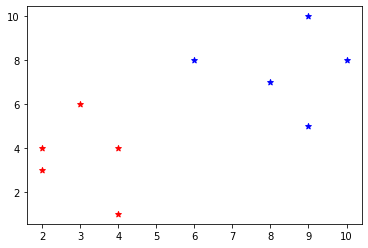

In [16]:
plt.scatter(class_1[:,0],class_1[:,1],marker='*',c='red')
plt.scatter(class_2[:,0],class_2[:,1],marker='*',c='blue')

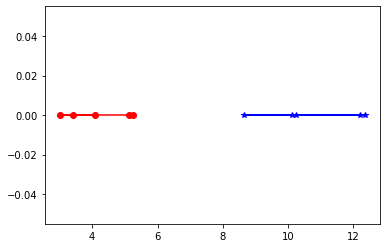

In [17]:
plt.plot(class_1_output[:],[0,0,0,0,0],marker='o',c='red')
plt.plot(class_2_output[:],[0,0,0,0,0],marker='*',c='blue')